##Import Dependences

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import KFold

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score,recall_score,precision_score, roc_curve, precision_recall_curve, roc_auc_score,f1_score


In [93]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import sys
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import scikitplot as skplt

In [95]:
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)

##Import Data

In [96]:
data = pd.read_csv("data.csv")
data.columns = ['Index', 'location', 'country', 'gender', 'age', 'vis_wuhan',
       'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'diff_sym_hos', 'result']
data.head(5)

,Index,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [97]:
df = data.drop(['Index'], axis=1)
df.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [98]:
data.describe()

,Index,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,431.000000,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,249.270937,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,215.500000,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,431.000000,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,646.500000,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,862.000000,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [100]:
df['age'].unique()

array([66. , 56. , 46. , 60. , 58. , 44. , 34. , 37. , 39. , 18. , 32. ,
       51. , 57. , 50. , 52. , 33. , 40. , 70. , 49.4, 28. , 19. , 29. ,
       55. , 68. , 38. , 72. , 45. , 42. , 69. , 63. , 62. , 49. , 48. ,
       36. , 59. , 23. , 43. , 22. , 47. , 53. , 30. ,  2. , 20. , 24. ,
       41. ,  9. , 27. , 15. , 79. , 21. , 64. , 71. , 31. , 35. ,  4. ,
       78. , 65. , 25. , 75. , 85. ,  5. , 54. , 26. , 82. , 61. , 11. ,
       77. , 76. , 67. , 74. , 73. ,  6. ,  8. , 80. , 91. , 86. , 83. ,
       96. , 16. , 89. , 81. ])

##Visulaize Data

**what is the most frequent age?**

In [101]:
df_Age = df['age'].value_counts().reset_index()
df_Age[:5]

,index,age
0,49.4,223
1,55.0,65
2,65.0,44
3,45.0,36
4,75.0,32


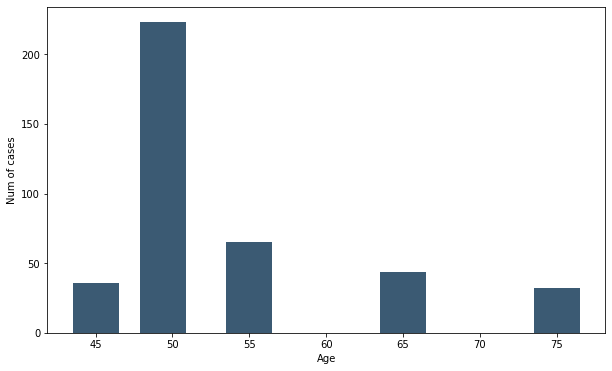

In [102]:
# plot bars in stack manner
plt.figure(figsize=(10,6))
plt.bar(df_Age[:5]['index'],df_Age[:5]['age'] ,width=3, color='#3B5A73')
plt.xlabel('Age')
plt.ylabel('Num of cases')
plt.show()

Text(0.5, 1.0, 'is case recovered or not according to age')

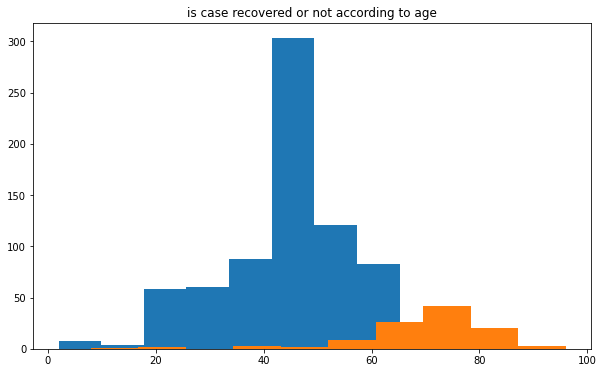

In [103]:
plt.figure(figsize=(10,6))
data.groupby('result').age.hist(grid =False);
plt.title('is case recovered or not according to age')

**what is the most frequent time before symptoms appear**

In [104]:
df_time = df['diff_sym_hos'].value_counts().reset_index()
df_time

,index,diff_sym_hos
0,0,629
1,1,73
2,2,39
3,3,28
4,4,25
5,5,18
6,6,12
7,8,9
8,9,8
9,12,5


In [105]:
df = df[df['diff_sym_hos']>=0]

In [106]:
df_time = df['diff_sym_hos'].value_counts().reset_index()
df_time

,index,diff_sym_hos
0,0,629
1,1,73
2,2,39
3,3,28
4,4,25
5,5,18
6,6,12
7,8,9
8,9,8
9,12,5


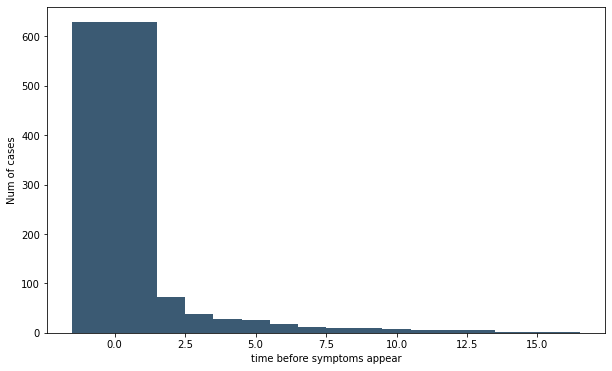

In [107]:
# plot bars in stack manner
plt.figure(figsize=(10,6))
plt.bar(df_time['index'],df_time['diff_sym_hos'] ,width=3, color='#3B5A73')
plt.xlabel('time before symptoms appear')
plt.ylabel('Num of cases')
plt.show()

**Visualize desteribution of deaths and recovery accourdeing to gender**

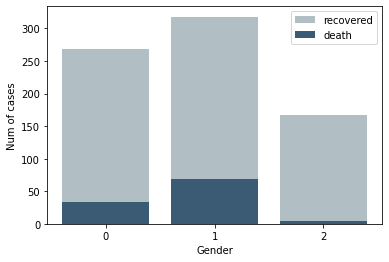

In [108]:
recoveredDF = df[(df['result']==0 )]['gender'].value_counts().reset_index()
deathDF = df[(df['result']==1 )]['gender'].value_counts().reset_index()

# plot bars in stack manner
plt.figure(figsize=(6,4))
plt.bar(recoveredDF['index'],recoveredDF['gender'], color='#B1BFC4')
plt.bar(deathDF['index'], deathDF['gender'], color='#3B5A73')
plt.xlabel('Gender')
plt.ylabel('Num of cases')
plt.xticks([0,1,2])
plt.legend(["recovered", "death"])
plt.show()

**Number of cases Vs. visit chain or not?**

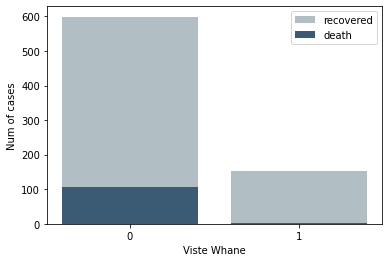

In [109]:
recoveredDF = df[(df['result']==0 )]["vis_wuhan"].value_counts().reset_index()
deathDF = df[(df['result']==1 )]["vis_wuhan"].value_counts().reset_index()

# plot bars in stack manner
plt.figure(figsize=(6,4))

plt.bar(recoveredDF['index'], recoveredDF['vis_wuhan'], color ='#B1BFC4', label ='Recovered Cases')
plt.bar(deathDF['index'], deathDF['vis_wuhan'], color ='#3B5A73', label ='Death Cases')

plt.xlabel('Viste Whane')
plt.ylabel('Num of cases')
plt.xticks([0,1])
plt.legend(["recovered", "death"])
plt.show()

**Number of cases Vs. from chain or not?**

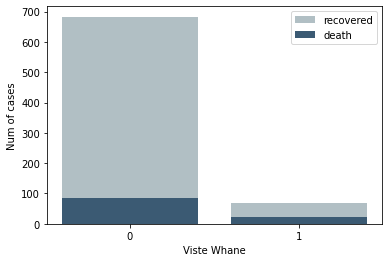

In [110]:
recoveredDF = df[(df['result']==0 )]["from_wuhan"].value_counts().reset_index()
deathDF = df[(df['result']==1 )]["from_wuhan"].value_counts().reset_index()

# plot bars in stack manner
plt.figure(figsize=(6,4))

plt.bar(recoveredDF['index'], recoveredDF['from_wuhan'], color ='#B1BFC4', label ='Recovered Cases')
plt.bar(deathDF['index'], deathDF['from_wuhan'], color ='#3B5A73', label ='Death Cases')

plt.xlabel('Viste Whane')
plt.ylabel('Num of cases')
plt.xticks([0,1])
plt.legend(["recovered", "death"])
plt.show()

**Test if Dataset is balanced or not?** 

In [111]:
IsBalanced = data["result"].value_counts().reset_index()
IsBalanced

,index,result
0,0,755
1,1,108


<AxesSubplot:xlabel='index', ylabel='result'>

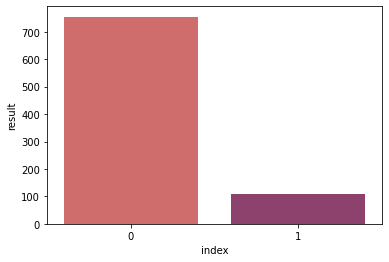

In [112]:
sns.barplot(x='index', y='result',data = IsBalanced, palette = 'flare')

**Show correlation between features**

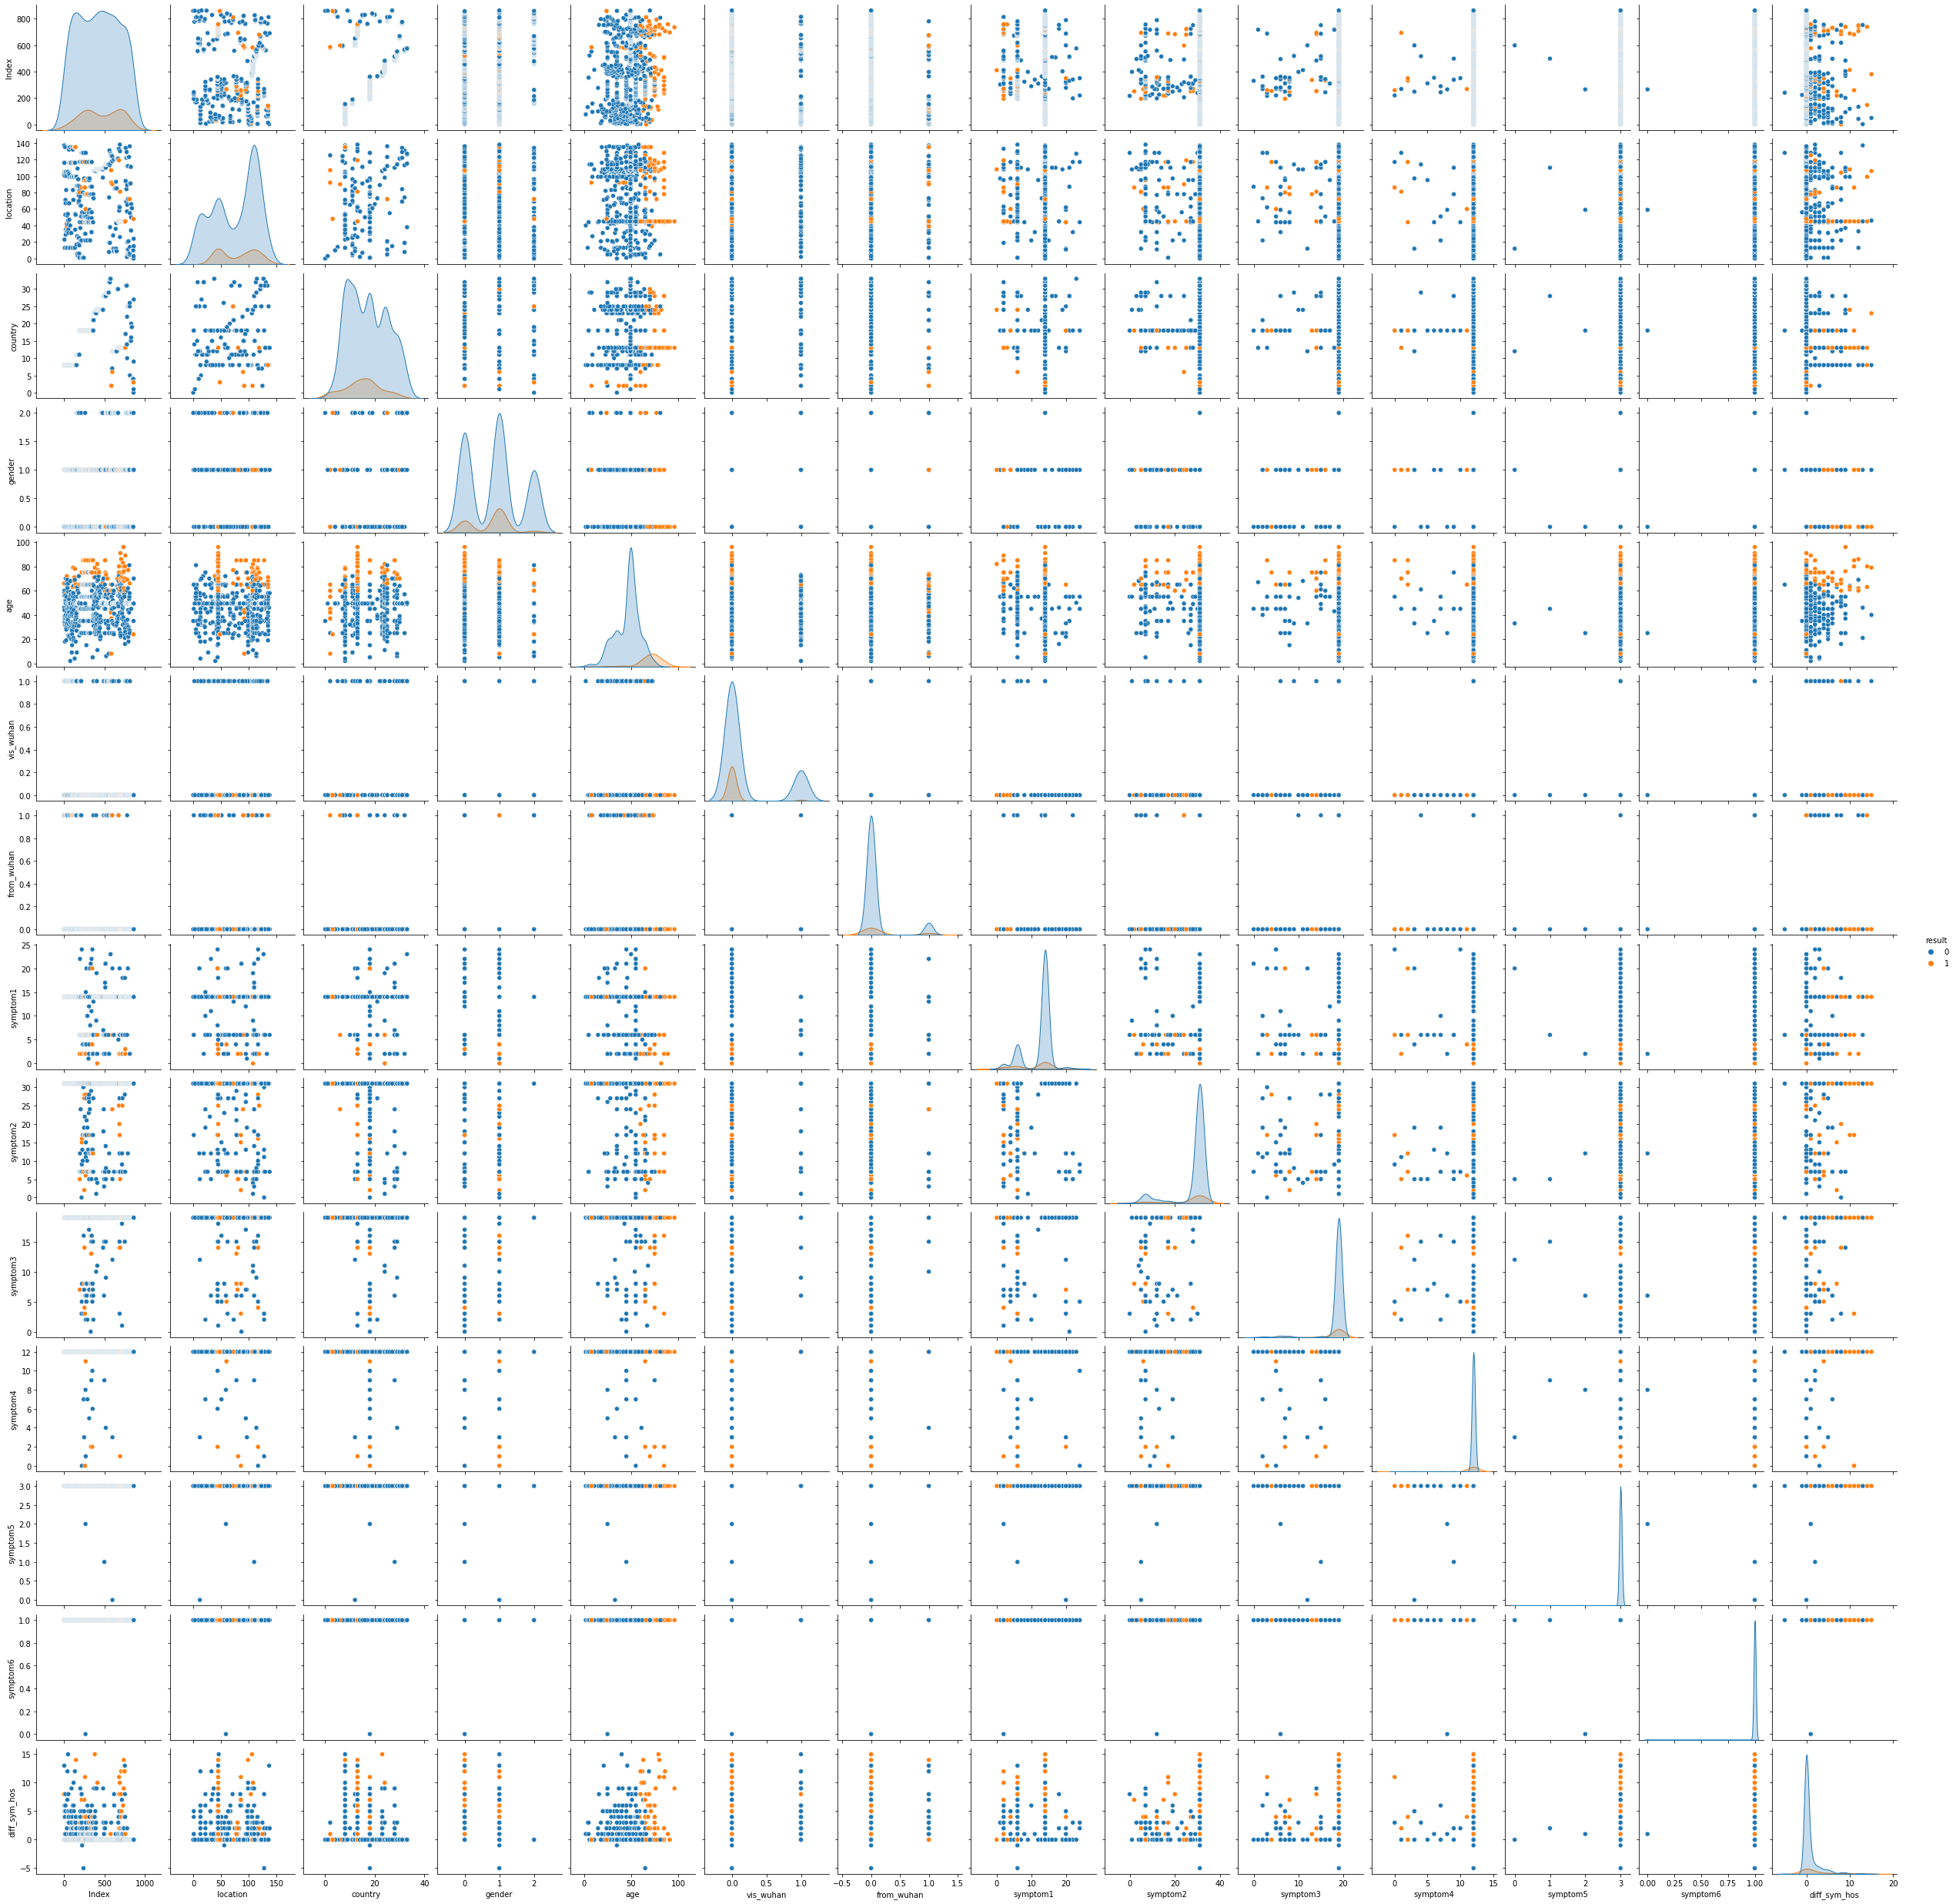

In [113]:
sns.pairplot(data=data,hue='result')

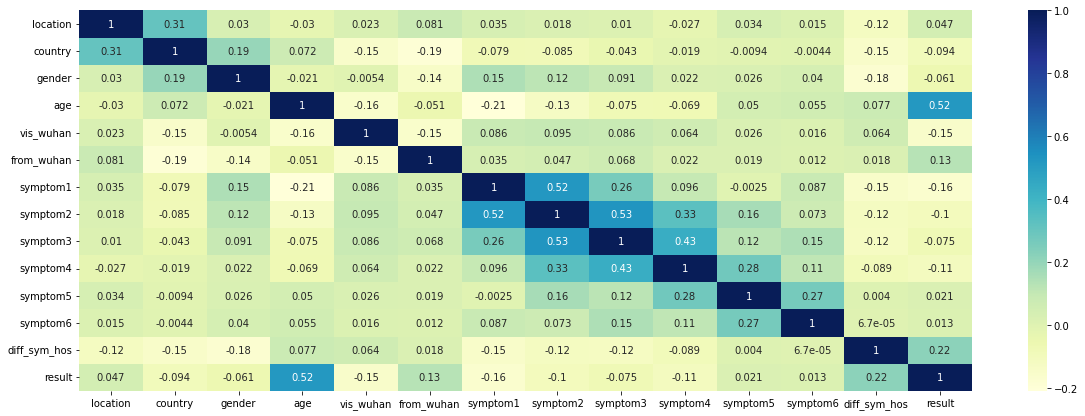

In [114]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

##Preprossesing

**Display Headers of columns**

In [115]:
print(data.columns)

Index(['Index', 'location', 'country', 'gender', 'age', 'vis_wuhan',
       'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'diff_sym_hos', 'result'],
      dtype='object')


###Normalization

In [116]:

# copy the data
df_min_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
df_min_max_scaled.head(10)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0.753623,0.242424,0.5,0.680851,1.0,0.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.533333,1.0
1,0.731884,0.242424,0.0,0.574468,0.0,1.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.000000,0.0
2,0.992754,0.242424,0.5,0.468085,0.0,1.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.866667,0.0
3,0.840580,0.242424,0.0,0.617021,1.0,0.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.000000,0.0
4,0.840580,0.242424,0.5,0.595745,0.0,0.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.000000,0.0
5,0.166667,0.242424,0.0,0.446809,0.0,1.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.000000,0.0
6,0.760870,0.242424,0.5,0.340426,0.0,1.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.000000,0.0
7,0.094203,0.242424,0.5,0.372340,1.0,0.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.400000,0.0
8,0.094203,0.242424,0.5,0.393617,1.0,0.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.333333,0.0
9,0.094203,0.242424,0.5,0.574468,1.0,0.0,0.583333,1.0,1.0,1.0,1.0,1.0,0.266667,0.0


In [117]:
df = df_min_max_scaled

###Standarize data

In [118]:
# from sklearn.preprocessing import StandardScaler
# sc_x = StandardScaler()
# X_train = sc_x.fit_transform(X_train) 
# X_test = sc_x.transform(X_test)
  
# print (X_train[0:10, :])

###Splite data 


In [119]:
X,y = df[[ 'country', 'gender', 'age', 'vis_wuhan',
       'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4',
       'symptom5', 'symptom6', 'diff_sym_hos']] , df["result"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 , stratify=y)

**Check percentage of each class In train & test data**

In [121]:
print("Death Percentage in train data : ", y_train[y_train == 1 ].count()/y_train.count())
print("Death Percentage in test data : ", y_test[y_test == 1 ].count()/y_test.count())

Death Percentage in train data :  0.125
Death Percentage in test data :  0.12716763005780346


In [122]:
print("Recovered Percentage in train data : ", y_train[y_train == 0 ].count()/y_train.count())
print("Recovered Percentage in test data : ", y_test[y_test == 0 ].count()/y_test.count())

Recovered Percentage in train data :  0.875
Recovered Percentage in test data :  0.8728323699421965


##Create ML Model

###KNeighborsClassifier

####Create Model

In [123]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(3,round(math.sqrt(X_train.shape[0])+1)).tolist()
p=[1,2]
##K-nearest neighbors parameters

n_neighbors_paras = {'leaf_size': np.arange(1,50).tolist(),
'weights': ['uniform', 'distance'],
'algorithm':['auto'],
'n_neighbors':n_neighbors,
'p':p,
'n_jobs': [-1]}
knn_clf = KNeighborsClassifier(n_jobs=-1)
#grid search to estimate best hyperparameters for KNN classifer
GS_KNNclf = GridSearchCV(knn_clf, n_neighbors_paras,refit ='precision',verbose=3 , cv=5)

#start train knn classifer
GS_KNNclf.fit(X_train, y_train)


Streaming output truncated to the last 5000 lines.
[CV 1/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=uniform;, score=0.884 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=uniform;, score=0.899 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=uniform;, score=0.899 total time=   0.0s
[CV 4/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=uniform;, score=0.898 total time=   0.0s
[CV 5/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=uniform;, score=0.883 total time=   0.0s
[CV 1/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=distance;, score=0.913 total time=   0.0s
[CV 2/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weights=distance;, score=0.928 total time=   0.0s
[CV 3/5] END algorithm=auto, leaf_size=39, n_jobs=-1, n_neighbors=17, p=1, weig

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_jobs': [-1],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             refit='precision', verbose=3)

In [124]:
print(GS_KNNclf.best_estimator_)

KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=4, p=1,
                     weights='distance')


####Calculate precision,recall,f1-score and confusion matrix

In [125]:

#predict test samples
y_pred = GS_KNNclf.predict(X_test)
y_proba = GS_KNNclf.predict_proba(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       151
         1.0       0.76      0.59      0.67        22

    accuracy                           0.92       173
   macro avg       0.85      0.78      0.81       173
weighted avg       0.92      0.92      0.92       173



In [126]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
 
print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.782


Test Accuracy : 0.9248554913294798
Precision: 0.765
Recall: 0.591
F-Measure: 0.667


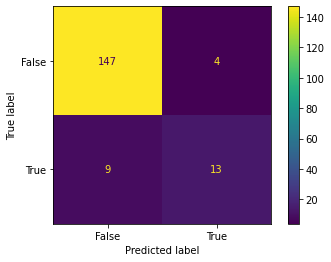

In [127]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(y_test, y_pred))

# calculate prediction
precision = precision_score(y_test, y_pred, labels=[1,2])
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)


# Calculate the confusion matrix

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True] )

cm_display.plot()
plt.show()

In [128]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       151
         1.0       0.76      0.59      0.67        22

    accuracy                           0.92       173
   macro avg       0.85      0.78      0.81       173
weighted avg       0.92      0.92      0.92       173



####Calculate AUC & plot ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


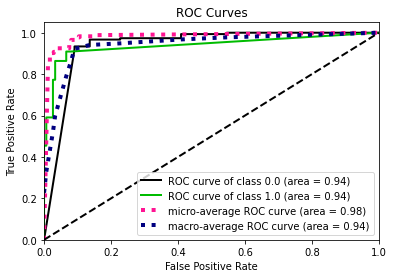

In [129]:
skplt.metrics.plot_roc_curve(y_test, y_proba)
plt.show()

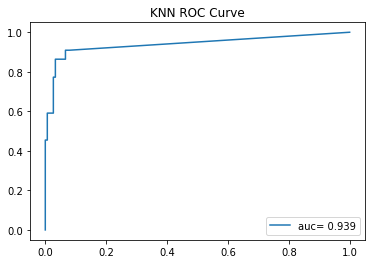

In [130]:
y_pred_proba = GS_KNNclf.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_knn = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_knn,tpr_knn,label='auc= %.3f'% auc_knn)
plt.legend(loc=4)
plt.title("KNN ROC Curve")
plt.show()

###Logistic Regression 

####Create Model

In [131]:
from sklearn.linear_model import LogisticRegression
LogRegClassifier = LogisticRegression(random_state = 0)
Parameters = {'penalty':['l2']
              ,'C':[1e5,1e4,1e3,1e2,10,1,0.5,0.1,0.01,0.05,0.0001,0.0005]
              ,'solver':["liblinear"],'max_iter' : [10000]}

GS_LogRegClassifier = GridSearchCV(LogRegClassifier,Parameters, refit =  'precision',verbose=3 , cv=5)

GS_LogRegClassifier.fit(X_train, y_train)
#predict test samples
y_pred = GS_LogRegClassifier.predict(X_test)

#predict the probabilty of each sample to make smooth curve
y_proba = GS_LogRegClassifier.predict_proba(X_test)


print(GS_LogRegClassifier.best_estimator_)

# print classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=100000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.935 total time=   0.0s
[CV 2/5] END C=100000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.971 total time=   0.0s
[CV 3/5] END C=100000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.942 total time=   0.0s
[CV 4/5] END C=100000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.920 total time=   0.0s
[CV 5/5] END C=100000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.949 total time=   0.0s
[CV 1/5] END C=10000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.935 total time=   0.0s
[CV 2/5] END C=10000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.971 total time=   0.0s
[CV 3/5] END C=10000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.942 total time=   0.0s
[CV 4/5] END C=10000.0, max_iter=10000, penalty=l2, solver=liblinear;, score=0.920 total time=   0.0s
[CV 5/5] END C=1

####Calculate precision,recall,f1-score and confusion matrix

Test Accuracy : 0.953757225433526
Precision: 0.938
Recall: 0.682
F-Measure: 0.789


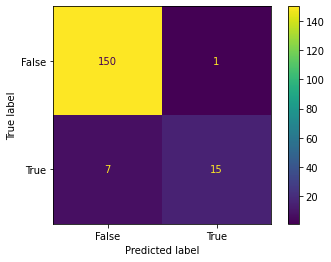

In [132]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(y_test, y_pred))

# calculate prediction
precision = precision_score(y_test, y_pred, labels=[1,2])
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)


# Calculate the confusion matrix

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True] )

cm_display.plot()
plt.show()

In [133]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       151
         1.0       0.94      0.68      0.79        22

    accuracy                           0.95       173
   macro avg       0.95      0.84      0.88       173
weighted avg       0.95      0.95      0.95       173



####Calculate AUC & plot ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


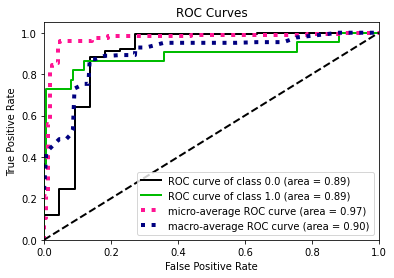

In [134]:
skplt.metrics.plot_roc_curve(y_test, y_proba)
plt.show()

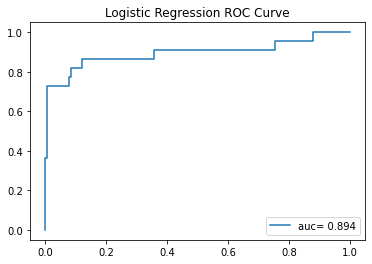

In [135]:
y_pred_proba = GS_LogRegClassifier.predict_proba(X_test)[::,1]
fpr_log, tpr_log, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_log = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_log,tpr_log,label='auc= %.3f'% auc_log)
plt.legend(loc=4)
plt.title("Logistic Regression ROC Curve")
plt.show()

###Naive Bayes

####Create Model

In [136]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gaussian_paras = {
    'var_smoothing': np.logspace(0, -10, num=200)
    #,'priors': [0.2,0.8]
}
#grid search to estimate best hyperparameters for Gaussian naive bayes classifer

GS_gnb = GridSearchCV(gnb,gaussian_paras, refit =  'precision',verbose=3 , cv=5)

GS_gnb.fit(X_train, y_train)

y_pred = GS_gnb.predict(X_test)
y_proba = GS_gnb.predict_proba(X_test)

# print classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.877 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.884 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.870 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.876 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.876 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.890735463861044;, score=0.877 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.890735463861044;, score=0.884 total time=   0.0s
[CV 3/5] END ...var_smoothing=0.890735463861044;, score=0.870 total time=   0.0s
[CV 4/5] END ...var_smoothing=0.890735463861044;, score=0.869 total time=   0.0s
[CV 5/5] END ...var_smoothing=0.890735463861044;, score=0.876 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.7934096665797492;, score=0.877 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.79340966657974

In [137]:
print(GS_gnb.best_estimator_)

GaussianNB(var_smoothing=0.031078661877820123)


####Calculate precision,recall,f1-score and confusion matrix

Test Accuracy : 0.861271676300578
Precision: 0.467
Recall: 0.636
F-Measure: 0.538


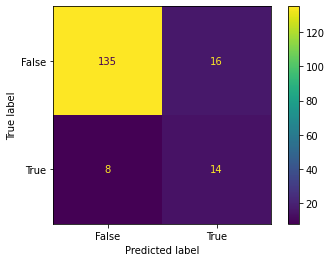

In [138]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(y_test, y_pred))

# calculate prediction
precision = precision_score(y_test, y_pred, labels=[1,2])
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)


# Calculate the confusion matrix

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True] )

cm_display.plot()
plt.show()

####Calculate AUC & plot ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


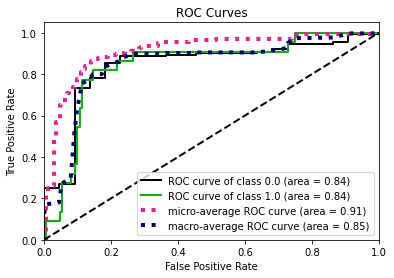

In [139]:
skplt.metrics.plot_roc_curve(y_test, y_proba)
plt.show()

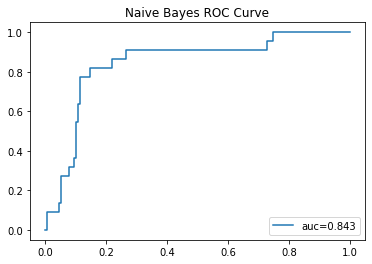

In [155]:
y_pred_proba = GS_gnb.predict_proba(X_test)[::,1]
fpr_NV, tpr_NV, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_NV = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_NV,tpr_NV,label='auc=%.3f' % auc_NV)
plt.legend(loc=4)
plt.title("Naive Bayes ROC Curve")
plt.show()

###Decision Tree Classifier

####Create Model

In [141]:
from sklearn import tree

#Create pipline steps
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

# Creata Parameter 
n_components = list(range(1,X_train.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict( dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)
#Use Grid search to tune hyperparameter
Decisiontree = GridSearchCV(pipe, parameters,cv=5, n_jobs=-1,refit =  'precision', verbose=1, scoring = "accuracy")
Decisiontree = Decisiontree.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [142]:
print('Best Criterion:', Decisiontree.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', Decisiontree.best_estimator_.get_params()['dec_tree__max_depth'])
# print('Best Number Of Components:', Decisiontree.best_estimator_.get_params()['pca__n_components'])
print(); print(Decisiontree.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 12

DecisionTreeClassifier(max_depth=12)


In [143]:
y_pred = Decisiontree.predict(X_test)
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       151
         1.0       0.95      0.91      0.93        22

    accuracy                           0.98       173
   macro avg       0.97      0.95      0.96       173
weighted avg       0.98      0.98      0.98       173



####Calculate precision,recall,f1-score and confusion matrix

Test Accuracy : 0.9826589595375722
Precision: 0.952
Recall: 0.909
F-Measure: 0.930


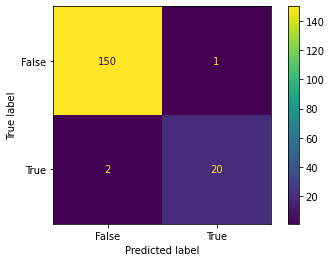

In [144]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(y_test, y_pred))

# calculate prediction
precision = precision_score(y_test, y_pred, labels=[1,2])
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)


# Calculate the confusion matrix

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True] )

cm_display.plot()
plt.show()

In [145]:
y_probas = Decisiontree.predict_proba(X_test)

####Calculate AUC & plot ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


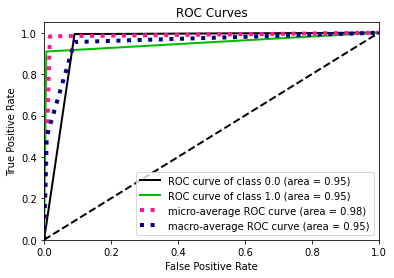

In [146]:
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

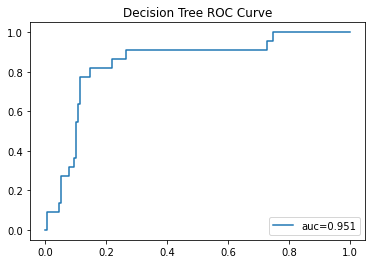

In [147]:
y_pred_proba = Decisiontree.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_NV,tpr_NV,label='auc=%.3f'%auc_DT)
plt.legend(loc=4)
plt.title("Decision Tree ROC Curve")
plt.show()


###Support Vector Machines

####Create Model

In [148]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters =  {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svc = svm.SVC(probability=True)
svm_GD= GridSearchCV(svc, parameters,refit =  'precision',verbose=3 , cv=5)
svm_GD.fit(X, y)
sorted(svm_GD.cv_results_.keys())
y_pred = svm_GD.predict(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.872 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [149]:
# print best parameter after tuning
print(svm_GD.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_GD.best_estimator_)


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, gamma=1, probability=True)


####Calculate precision,recall,f1-score and confusion matrix

In [150]:
y_pred = svm_GD.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       151
         1.0       0.96      1.00      0.98        22

    accuracy                           0.99       173
   macro avg       0.98      1.00      0.99       173
weighted avg       0.99      0.99      0.99       173



Test Accuracy : 0.9942196531791907
Precision: 0.957
Recall: 1.000
F-Measure: 0.978


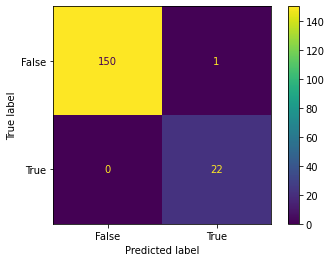

In [151]:
#Calculate Accuracy
print("Test Accuracy :", accuracy_score(y_test, y_pred))

# calculate prediction
precision = precision_score(y_test, y_pred, labels=[1,2])
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)

# calculate F1 score
score = f1_score(y_test, y_pred)
print('F-Measure: %.3f' % score)


# Calculate the confusion matrix

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True] )

cm_display.plot()
plt.show()

####Calculate AUC & plot ROC Curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


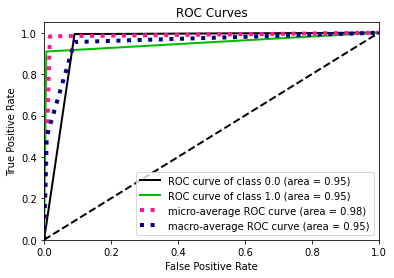

In [152]:
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

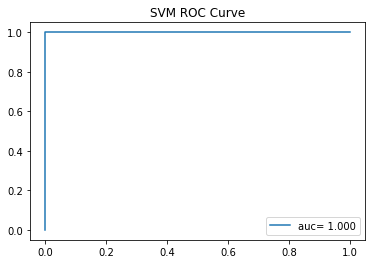

In [153]:
y_pred_proba = svm_GD.predict_proba(X_test)[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label='auc= %.3f'% auc_SVM)
plt.legend(loc=4)
plt.title("SVM ROC Curve")
plt.show()

#Visualize Result of all models

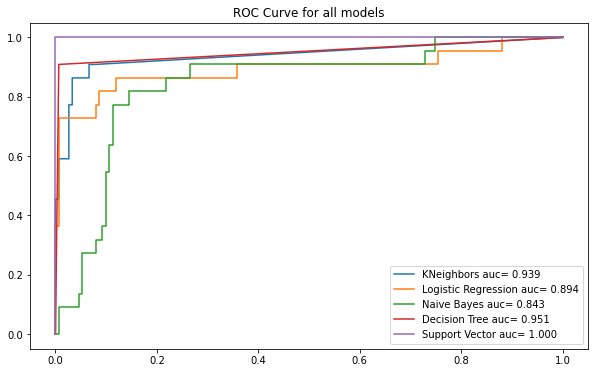

In [154]:
# Plot ROC Curve for all models 
plt.figure(figsize=(10,6))

plt.plot(fpr_knn,tpr_knn,label='KNeighbors auc= %.3f'% auc_knn)
plt.plot(fpr_log,tpr_log,label='Logistic Regression auc= %.3f'% auc_log)
plt.plot(fpr_NV,tpr_NV,label='Naive Bayes auc= %.3f'% auc_NV)
plt.plot(fpr_DT,tpr_DT,label='Decision Tree auc= %.3f'% auc_DT)
plt.plot(fpr_SVM,tpr_SVM,label='Support Vector auc= %.3f'% auc_SVM)
plt.legend(loc=4)
plt.title("ROC Curve for all models")
plt.show()# Plot ROC Curve for all models 



**when we compare between all the models we find that the best model for our data set is the SVM model**